In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def wavelength_to_rgb(wavelength):

    w = int(wavelength)

    # Значения RGB в зависимости от длины волны
    if w >= 380 and w < 440:
        R, G, B = -(w - 440.) / (440. - 350.), 0, 1
    elif w >= 440 and w < 490:
        R, G, B = 0, (w - 440.) / (490. - 440.), 1
    elif w >= 490 and w < 510:
        R, G, B = 0, 1, -(w - 510.) / (510. - 490.)
    elif w >= 510 and w < 580:
        R, G, B = (w - 510.) / (580. - 510.), 1, 0
    elif w >= 580 and w < 645:
        R, G, B = 1, -(w - 645.) / (645. - 580.), 0
    elif w >= 645 and w <= 780:
        R, G, B = 1, 0, 0
    else:
        R, G, B = 0, 0, 0

    # Интенсивность света в зависимости от длины волны
    if w >= 380 and w < 420:
        SSS = 0.3 + 0.7*(w - 350) / (420 - 350)
    elif w >= 420 and w <= 700:
        SSS = 1.0
    elif w > 700 and w <= 780:
        SSS = 0.3 + 0.7*(780 - w) / (780 - 700)
    else:
        SSS = 0.0
    SSS *= 255

    return int(SSS*R), int(SSS*G), int(SSS*B)

In [3]:
def scale_pixel_value(pixel_value):
    '''Масштабирует значения пикселей от 0-255 до 400-700'''
    return 400 + (pixel_value / 255) * 300

In [4]:
def apply_color_coding(img_path):
    original_img = cv2.imread(img_path)
    img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
    colored_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            wavelength = scale_pixel_value(img[i, j])
            r, g, b = wavelength_to_rgb(wavelength)
            colored_img[i, j] = [r, g, b]

    return original_img, img, colored_img

In [5]:
def plot_images(original, grayscale, colored):
    plt.figure(figsize=(20, 10))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Оригинальное изображение')

    plt.subplot(1, 3, 2)
    plt.imshow(grayscale, cmap='gray')
    plt.title('Черно-белое изображение')

    plt.subplot(1, 3, 3)
    plt.imshow(colored)
    plt.title('Измененное изображение')

    plt.show()

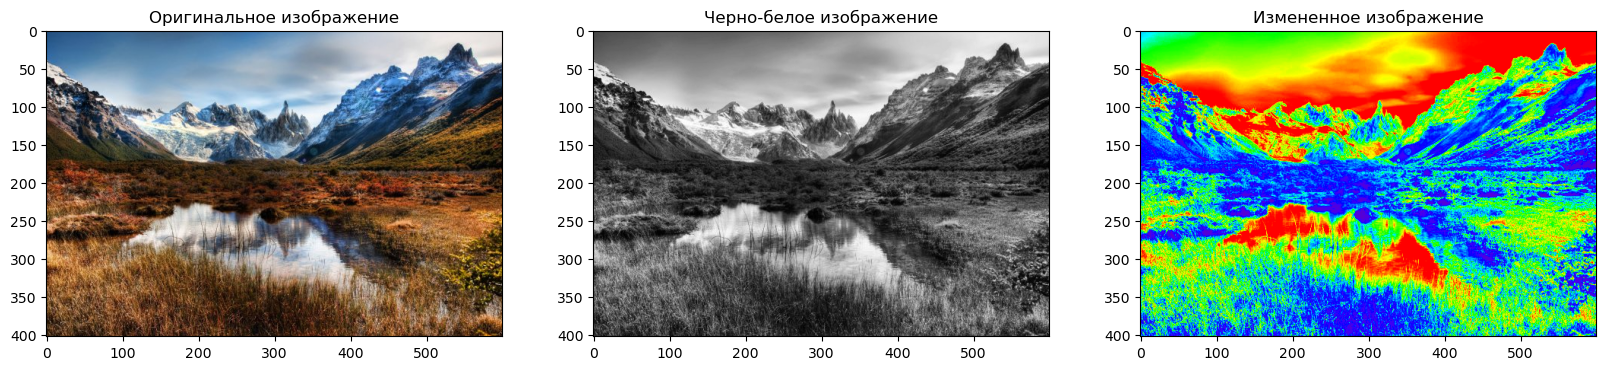

In [6]:
# Пример использования
original, grayscale, colored = apply_color_coding('img/5.jpg')
plot_images(original, grayscale, colored)